In [1]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('train_frequency.csv') # train data
test_data = pd.read_csv("test_frequency.csv") # test data
train_label = pd.read_csv("../trainLabels.csv") # train labels
test_label = pd.read_csv("../testLabels.csv") # test labels

In [3]:
# From this cell to a few below cells, I'm going to manipulate the data into numpy that can be fitted to XGBoost.
train_data_with_labels = pd.merge(train_data, train_label, on="Id")
test_data_with_labels = pd.merge(test_data, test_label, on="Id")

In [4]:
train_complete_numpy = train_data_with_labels.to_numpy().T
test_complete_numpy = test_data_with_labels.to_numpy().T

In [5]:
train_data = train_complete_numpy[1:-1].T
train_label = train_complete_numpy[-1] - 1 # since XGBoost take labels as 0 ~ num_class -1, have to subtract 1
test_data = test_complete_numpy[1:-1].T
test_label = test_complete_numpy[-1] - 1

In [6]:
train = xgb.DMatrix(train_data, label = train_label)
test = xgb.DMatrix(test_data, label = test_label)

In [7]:
param = {'max_depth': 4, 'eta':0.3, 'objective':'multi:softmax','num_class':9 }
epochs = 10

In [8]:
model = xgb.train(param, train, epochs) # model training

In [9]:
prediction = model.predict(test)

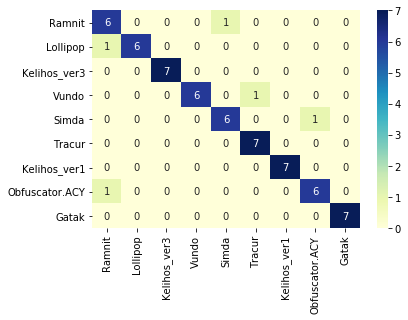

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
c = confusion_matrix(test_label.astype(np.int8), prediction)

classes = ["Ramnit",
"Lollipop",
"Kelihos_ver3",
"Vundo",
"Simda",
"Tracur",
"Kelihos_ver1",
"Obfuscator.ACY",
"Gatak"]

df_cm = pd.DataFrame(c, index = classes, columns = classes)
sn.heatmap(df_cm, annot=True, cmap="YlGnBu")

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(test_label.astype(np.int8), prediction)

0.9206349206349206

In [12]:
tp_fn = c.sum(1)
tp_fp = c.sum(0)
tp = c.diagonal()
precision = (tp*1.0/tp_fp)
recall = (tp*1.0/tp_fn)

In [13]:
pd.DataFrame([precision, recall],
                         columns = ["Ramnit", "Lollipop", "Kelihos_ver3", "Vundo", "Simda", "Tracur", "Kelihos_ver1", "Obfuscator.ACY", "Gatak"],
                         index = ['Precision', 'Recall'] )

,Ramnit,Lollipop,Kelihos_ver3,Vundo,Simda,Tracur,Kelihos_ver1,Obfuscator.ACY,Gatak
Precision,0.750000,1.000000,1.0,1.000000,0.857143,0.875,1.0,0.857143,1.0
Recall,0.857143,0.857143,1.0,0.857143,0.857143,1.000,1.0,0.857143,1.0
